In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import fiona

from matplotlib.patches import Polygon
from shapely.geometry import shape, box
from shapely.ops import cascaded_union

## Fiona, IPython Notebook interaction
##  Live 8.5  *  darkblue-b
##

Terminal Commands
----------------------
``Shell script can be executed with results stored into python variables``


In [2]:
shps = !ls /home/user/data/north_carolina/shape/*shp

Task: quickly examine the bounding areas of a directory of shapefiles
------------------------------------------------------------------
* use ``fiona.open()`` to read data files on disk
* save the filename and bounding box into a python ``dict``

.


In [3]:
td = {}

for shp in shps:
    with fiona.open( shp, 'r') as inp:
        td[ inp.name ] = inp.bounds

## Fiona inp.bounds => ( lower_lng, lower_lat, upper_lng, upper_lat)


In [4]:
## Create shapely geometry from the coords
## shapely/geometry/geo.py
##   box(minx, miny, maxx, maxy, ccw=True)

nboxes = []
for k,v in iter(td.iteritems()):
    nboxes.append( box( v[0], v[1], v[2], v[3]) )

print 'Found BBOXs: ',len(nboxes)

Found BBOXs:  44


In [5]:
## create a single cascaded UNION too
dst_poly = cascaded_union(nboxes)
dst_poly.bounds

(121862.14889275003, -15865.3468644768, 962679.9593500504, 407620.5610747712)

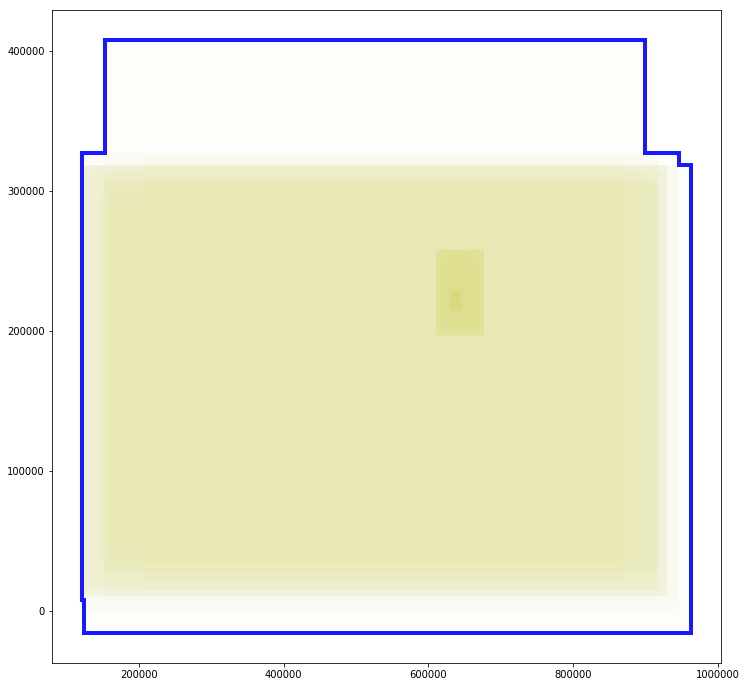

In [6]:
## Draw every BBOX for all files, transparently
## use matplotlib.Polygon to draw; let autoscale calculate the area

fig, ax = plt.subplots(figsize=(12,12))
for polygon in nboxes:
    mpl_poly = Polygon(np.array(polygon.exterior), facecolor="y", alpha=0.02)
    ax.add_patch(mpl_poly)

## Indicate the exterior of the study area with a heavy line
ax.add_patch( Polygon(np.array(dst_poly.exterior), fill=False, lw=4, ec="b", alpha=0.9) )

ax.relim()
ax.autoscale()